In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
groups_coarse = ['MCI', 'HO', 'HY']
groups_fine = ['MCI+', 'MCI-', 'MCIu', 'HO', 'HY']
conditions = ['StayS', 'WalkS', 'TelS', 'StayR', 'WalkR', 'TelR']
x_scale_3 = np.array([1, 2, 3])
x_scale_5 = np.array([1, 2, 3, 4, 5])
x_scale_6 = np.array([1, 2, 3, 4, 5, 6])
y_scale = np.linspace(0,1,11)
colors3 = ['pink', 'lightblue', 'lightgreen']
colors5 = ['salmon', 'orchid', 'pink', 'lightblue', 'lightgreen']
colors6 = ['springgreen', 'lightblue', 'lightsalmon', 'forestgreen', 'royalblue', 'tomato']

std = 0.45

def generate_data(order, n=25):
    scale = y_scale
    n_group = len(order)
    # print(n_group)
    s = std/n_group
    for i in order:
        segs =  (np.max(scale) - np.min(scale)) / (n_group + 1)
        # print(segs)
        mu = (i + 1) * segs
        # print(f"i: {i}, mu: {mu}")
        d = np.random.normal(mu, s, n).reshape(-1, 1)
        if i == order[0]:
            out = d
        else:
            out = np.concatenate([out, d], axis=1)
    return out

low_mid_high = generate_data([0, 1, 2])
high_mid_low = generate_data([2, 1, 0])
low_high_5 = generate_data([0, 1, 2, 3, 4])
high_low_5 = generate_data([4, 3, 2, 1, 0])
group_perf_5 = generate_data([0, 2, 1, 3, 4])
group_perf_5b = generate_data([i for i in reversed([0, 2, 1, 3, 4])])
cond_perf = generate_data([5, 2, 1, 0, 4, 3])

In [3]:
def x_way(data, xtlabs, title, colours):
    ax = plt.figure().add_subplot()
    medianprops = dict(linestyle='-', linewidth=1, color='black')
    bplot1 = ax.boxplot(data, patch_artist=True, 
                        medianprops=medianprops)
    ax.set_ylim(0, 1)
    ax.set_yticklabels("")
    ax.set_xticklabels(xtlabs)
    ax.set_title(title)
    # fill with colors

    for patch, color in zip(bplot1['boxes'], colours):
        patch.set_facecolor(color)

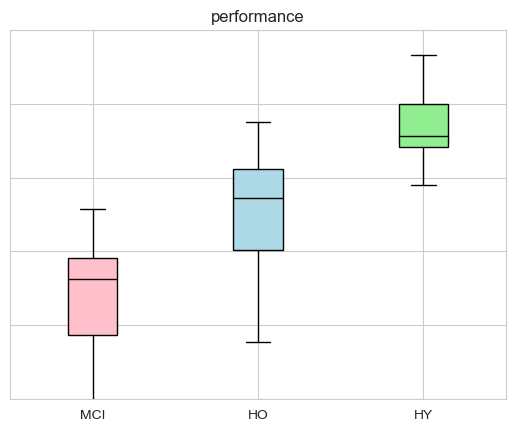

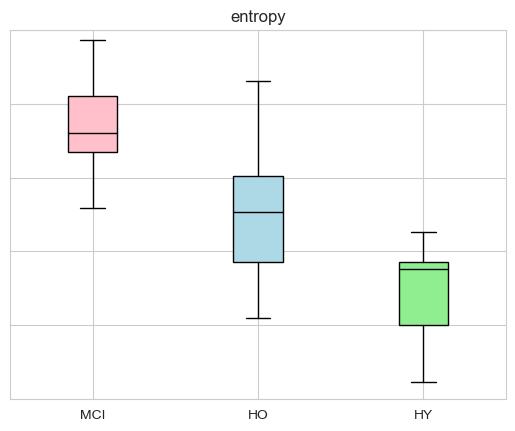

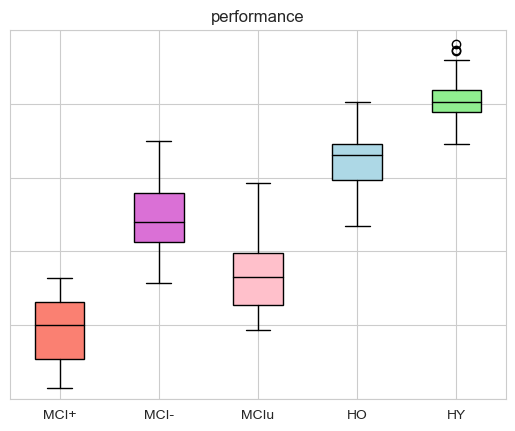

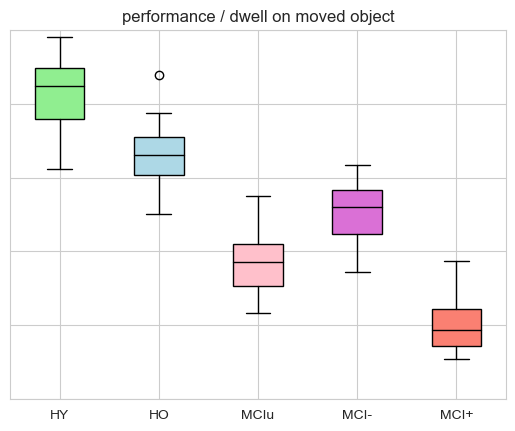

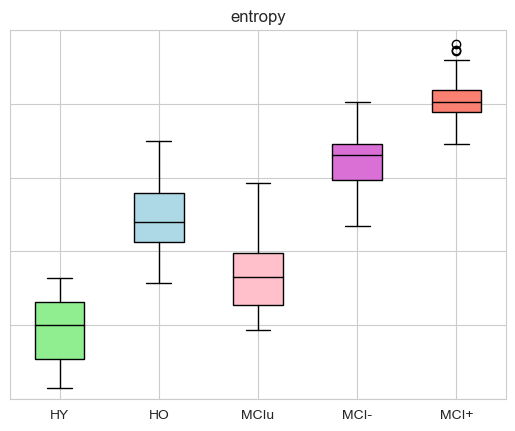

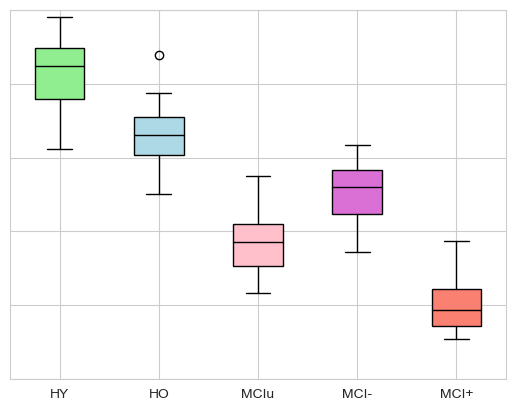

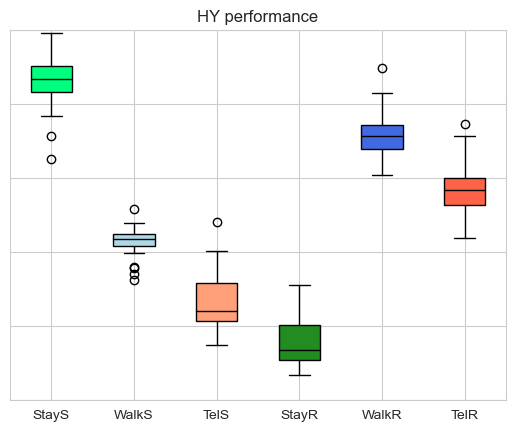

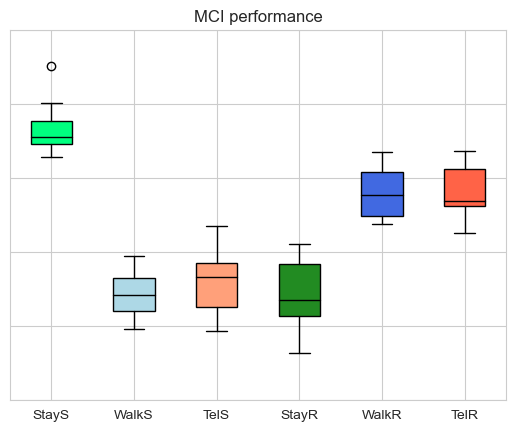

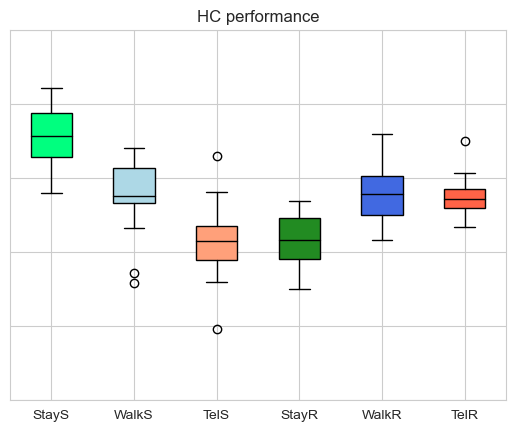

In [12]:
# performance
x_way(low_mid_high, groups_coarse, 'performance', colors3)
x_way(high_mid_low, groups_coarse, 'entropy', colors3)
x_way(group_perf_5, groups_fine, 'performance', colors5)
x_way(group_perf_5b, reversed(groups_fine), 'performance / dwell on moved object', reversed(colors5))
x_way(group_perf_5, reversed(groups_fine), 'entropy', reversed(colors5))
x_way(group_perf_5b, reversed(groups_fine), '', reversed(colors5))
x_way(cond_perf, conditions, 'HY performance', colors6)

# teleport hypotheses
x_way(generate_data([4, 1, 1, 1, 3, 3], n=15), conditions, 'MCI performance', colors6)
x_way(generate_data([4, 3, 2, 2, 3, 3]), conditions, 'HC performance', colors6)